In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.basemap import Basemap as Basemap
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import contextily as cx

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


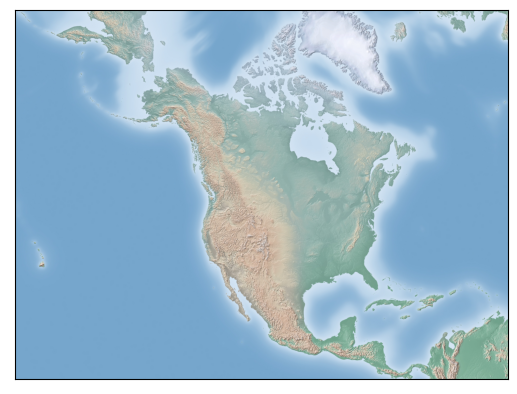

In [2]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
basemap1 = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
basemap1.shadedrelief()
plt.show()

<AxesSubplot:>

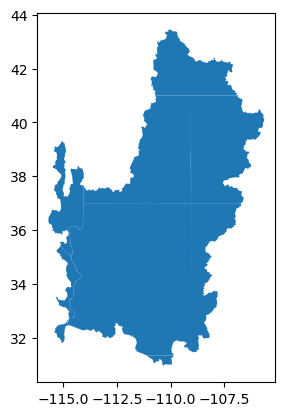

In [5]:
#pulling shape file very similar to csv file. basin polygon
basin_plot=gpd.read_file('/Users/ellieculverhouse/Desktop/Project_1/Basin_data/Colorado_River_Water_Allocation/Colorado_River_Water_Allocation.shp')
basin_plot.plot()

In [6]:
# CRS/ coordinate reference system tells Python how those coordinates relate to places on the Earth. 
#this tells python where to place your polygon or whatever
basin_plot.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
#not even sure what was happening here... i think just adding crs with basin map??
#set equal to plotting crs
basin_plot_wm = basin_plot.to_crs(epsg=3857)

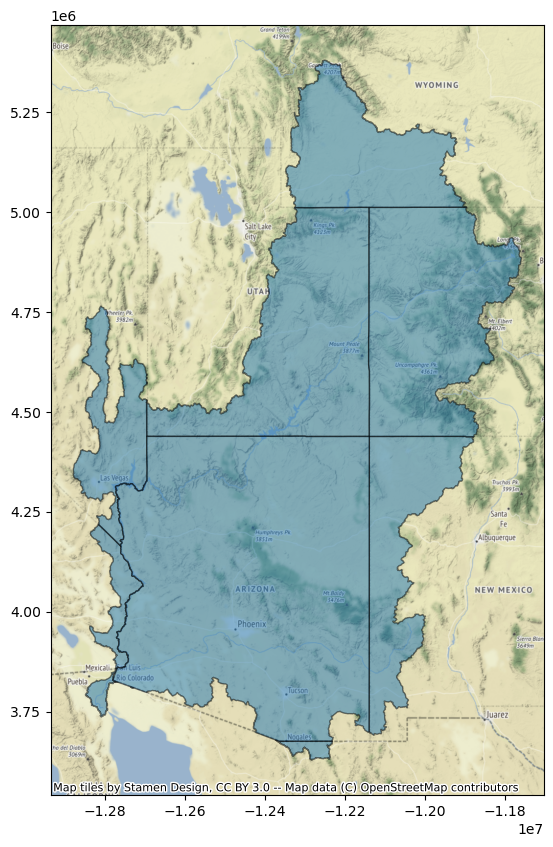

In [8]:
#shape file on basemap using CX
ax = basin_plot_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

#save plot
plt.savefig('basin map')

<AxesSubplot:>

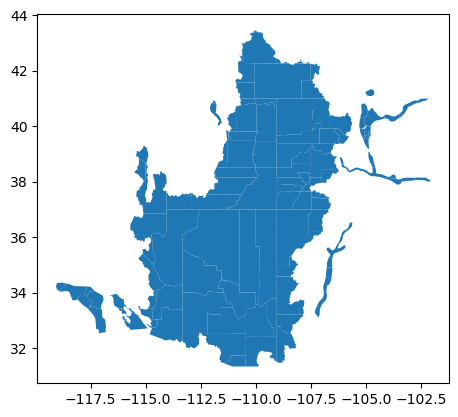

In [9]:
#pulling shape file very similar to csv file
basin_county=gpd.read_file('/Users/ellieculverhouse/Desktop/Project_1/Basin_data/Basin_county/Colorado_River_Basin_County_Boundaries/Colorado_River_Basin_County_Boundaries.shp')
basin_county.plot()

In [13]:
basin_county.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
basin_county_2 = basin_county.to_crs(epsg=3857)

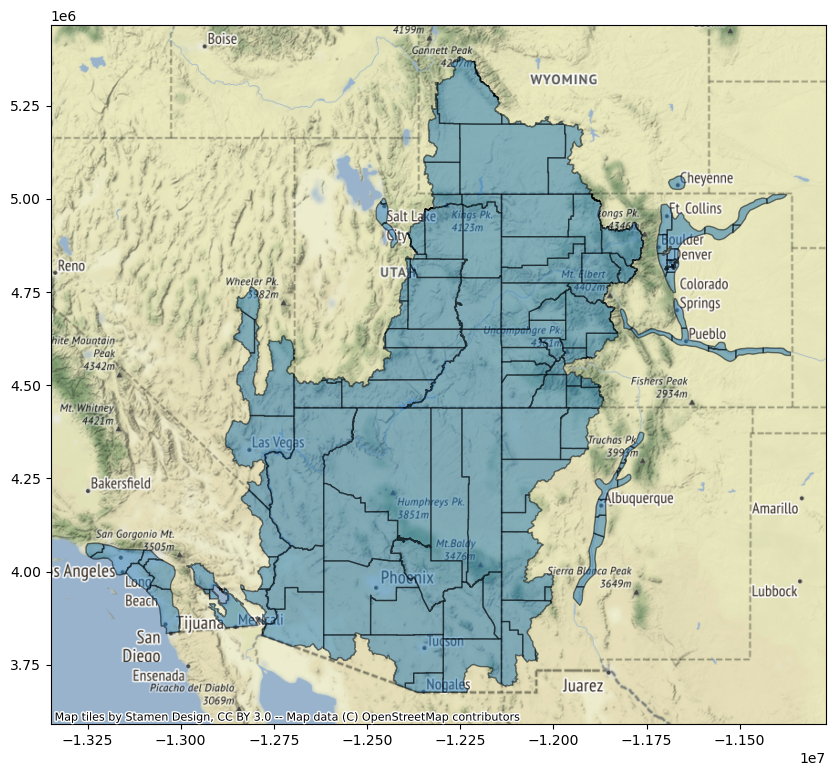

In [18]:
#adding county lines to basin
#not sure how to remoce extra ones
#we are just observing main covered polygon area (add others to limitation or future research)
ax = basin_county_2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)
plt.savefig('basinwithcounties.png')

<AxesSubplot:>

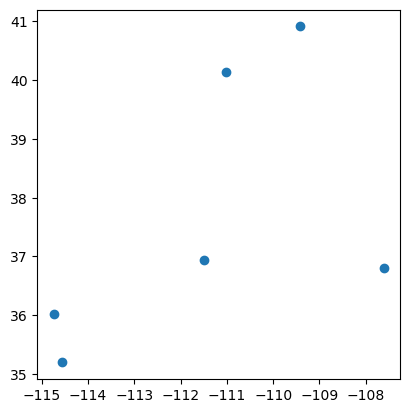

In [19]:
major_r=gpd.read_file('/Users/ellieculverhouse/Desktop/Project_1/Basin_data/Major_Colorado_River_Basin_Reservoirs/Major_Colorado_River_Basin_Reservoirs.shp')
major_r.plot()

In [20]:
major_r.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
major_r_2 = major_r.to_crs(epsg=3857)

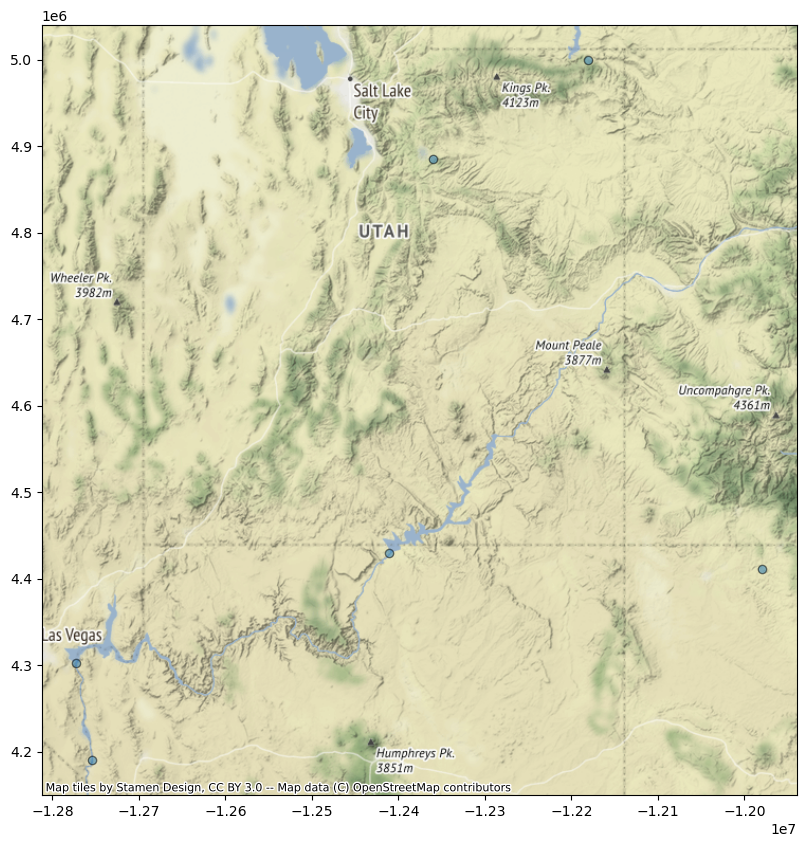

In [26]:
ax = major_r_2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)
#plt.savefig('basinwithcounties.png')

<AxesSubplot:>

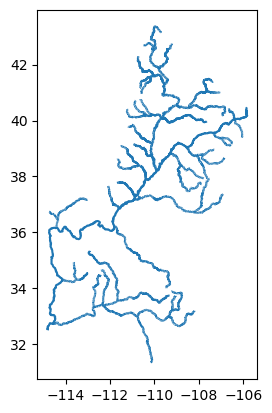

In [22]:
river=gpd.read_file('/Users/ellieculverhouse/Desktop/Project_1/Basin_data/Colorado_River_Basin_Rivers/Colorado_River_Basin_Rivers.shp')
river.plot()

In [23]:
river.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
river2 = river.to_crs(epsg=3857)

In [38]:
#combining shape files
river = gpd.read_file('/Users/ellieculverhouse/Desktop/Project_1/Basin_data/Colorado_River_Basin_Rivers/Colorado_River_Basin_Rivers.shp')
basin_county = gpd.read_file('/Users/ellieculverhouse/Desktop/Project_1/Basin_data/Basin_county/Colorado_River_Basin_County_Boundaries/Colorado_River_Basin_County_Boundaries.shp')

combined = gpd.GeoDataFrame(pd.concat([river, basin_county]))

In [39]:
combined.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
combined = combined.to_crs(epsg=3857)

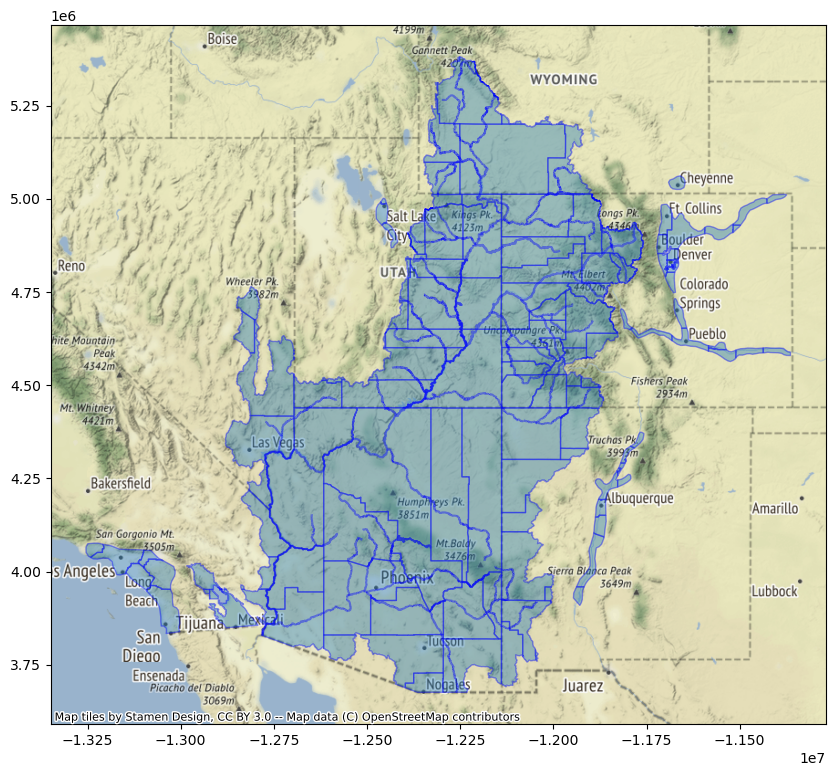

In [47]:
#ax = river2.plot(figsize=(10, 10), alpha=0.9, edgecolor='b')
ax = combined.plot(figsize=(10, 10), alpha=.4, edgecolor='b')
cx.add_basemap(ax)

#save figure
#plt.savefig('basin_map.png')

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
river = gpd.GeoDataFrame({'geometry': [Point(1, 1).buffer(3)], 'name': ['Shape 1']})
basin_county = gpd.GeoDataFrame({'geometry': [Point(1, 1).buffer(2)], 'name': ['Shape 2']})

In [ ]:
diffs = []
gdfs = [shp1, shp2]
for idx, gdf in enumerate(gdfs):
    if idx < 2:
        diffs.append(gdf.symmetric_difference(gdfs[idx+1]).iloc[0])
diffs.append(shp3.iloc[0].geometry)